In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# 1. generate time series 

In [29]:
series1 = []
series2 = []
series3 = []
np.random.seed(0)

for i in range(300):
    series1.append(np.random.normal())
    series2.append(np.random.normal(loc = i * 0.05))
    series3.append(np.random.normal(scale = 1 + i * 0.05))

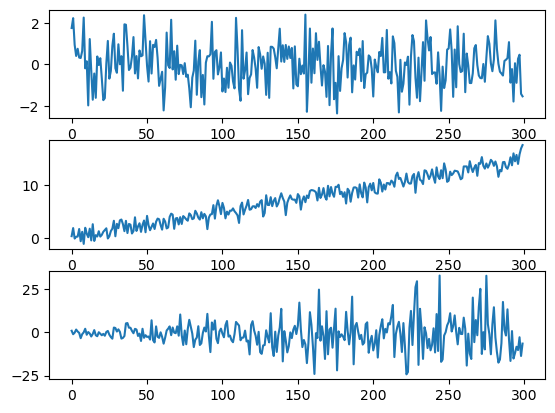

In [30]:
fig,axs=plt.subplots(3,1)
axs[0].plot(series1)
axs[1].plot(series2)
axs[2].plot(series3)

# 2. Import time series 

In [31]:
series=pd.read_csv(r"AAPL.csv", header=0,  index_col=False)
series.head(10)

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.099874
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.094663
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.087715
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.089886
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.092492
5,19-12-1980,0.126116,0.126116,48630400,0.126674,0.126116,0.098137
6,22-12-1980,0.132254,0.132254,37363200,0.132813,0.132254,0.102913
7,23-12-1980,0.137835,0.137835,46950400,0.138393,0.137835,0.107256
8,24-12-1980,0.145089,0.145089,48003200,0.145647,0.145089,0.112901
9,26-12-1980,0.158482,0.158482,55574400,0.159040,0.158482,0.123322


In [32]:
series.columns

Index(['Date', 'Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close'], dtype='object')

In [33]:
# Format the column Date from object to daytime
series['Date'] = pd.to_datetime(series['Date'], format='%d-%m-%Y', errors='coerce')
series['Date']

0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10585   2022-12-06
10586   2022-12-07
10587   2022-12-08
10588   2022-12-09
10589   2022-12-12
Name: Date, Length: 10590, dtype: datetime64[ns]

Text(0, 0.5, 'Closing price')

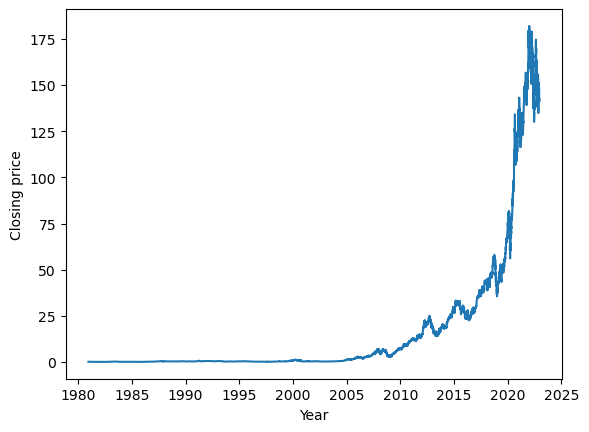

In [34]:
# Plot the entire time series of the stock closing price with matplotlib

plt.plot(series.Date, series.Close)
plt.xlabel("Year")
plt.ylabel("Closing price")

Text(0, 0.5, 'Closing price / Relative Change (in 1000%)')

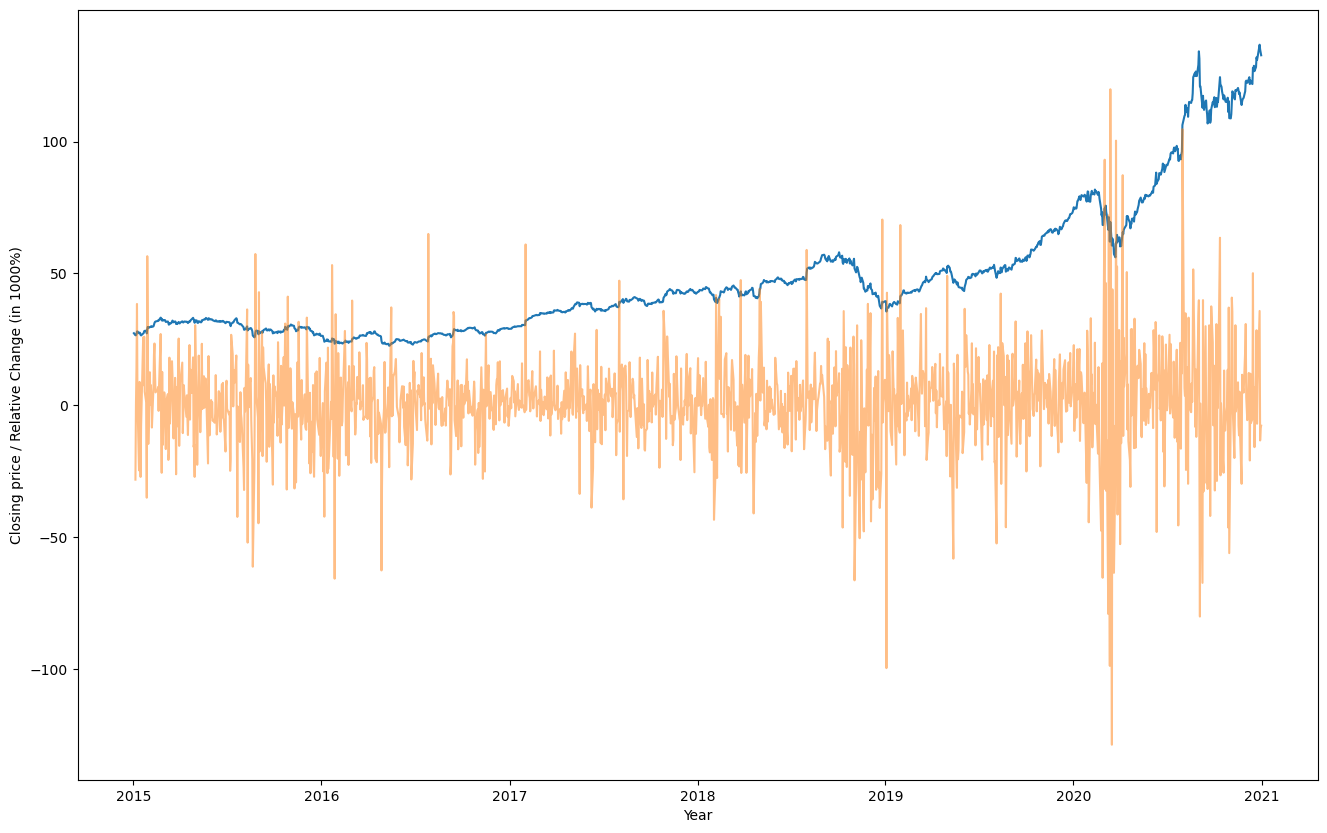

In [35]:
# Plot the time series of the closing price between 2005 and 2010
# Side by side comparison of the plots
timeframe = (series.Date >= '2015-01-01') & (series.Date < '2021-01-01')
series_relativechange = series.Close[timeframe].pct_change()
fig, ax=plt.subplots(figsize=(16,10))
ax.plot(series.Date[timeframe], series.Close[timeframe])
ax.plot(series.Date[timeframe], 1000*series_relativechange, alpha = 0.5)
plt.xlabel("Year")
plt.ylabel("Closing price / Relative Change (in 1000%)")

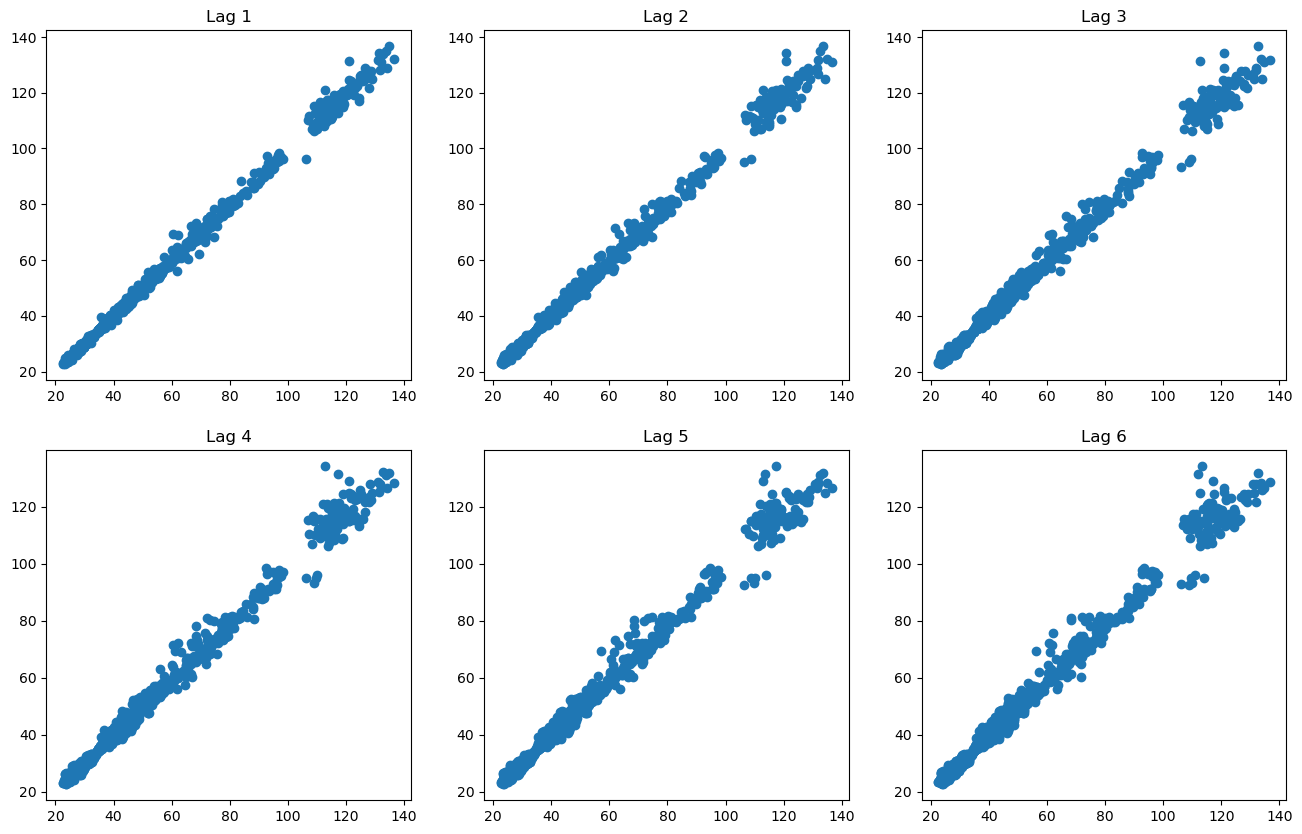

In [36]:
# Generate scatterplots for lags 1 to 6 for the original series.
fig, axs=plt.subplots(2,3,figsize=(16,10))
for i in range(6):
    axs[i//3,i%3].set_title('Lag '+str(i+1))
    axs[i//3,i%3].scatter(series.Close[timeframe][(i+1):],
                          series.Close[timeframe][:-(i+1)])

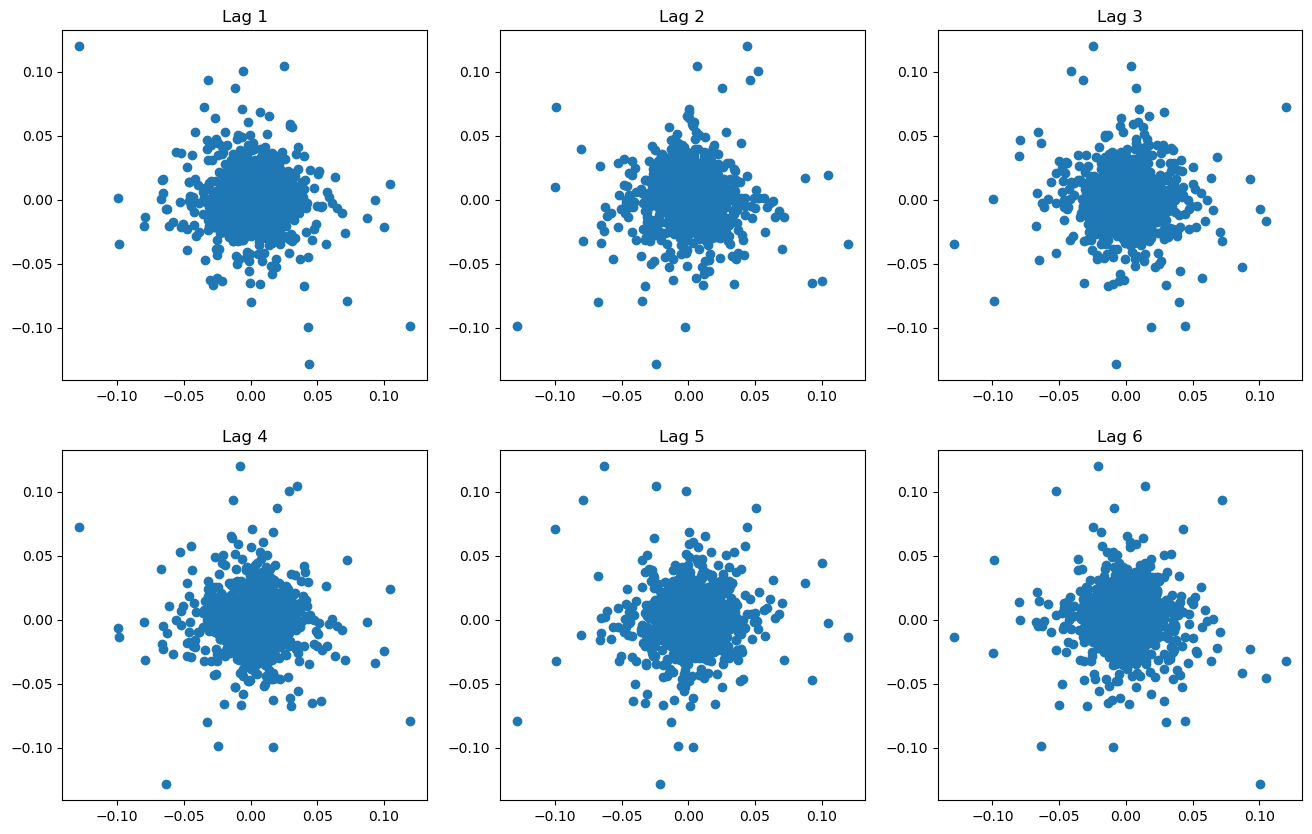

In [37]:
# Generate scatterplots for lags 1 to 6 for the stationary series
fig, axs=plt.subplots(2,3,figsize=(16,10))
for i in range(6):
    axs[i//3,i%3].set_title('Lag '+str(i+1))
    axs[i//3,i%3].scatter(series_relativechange[(i+1):],
                          series_relativechange[:-(i+1)])

(-0.25, 0.25)

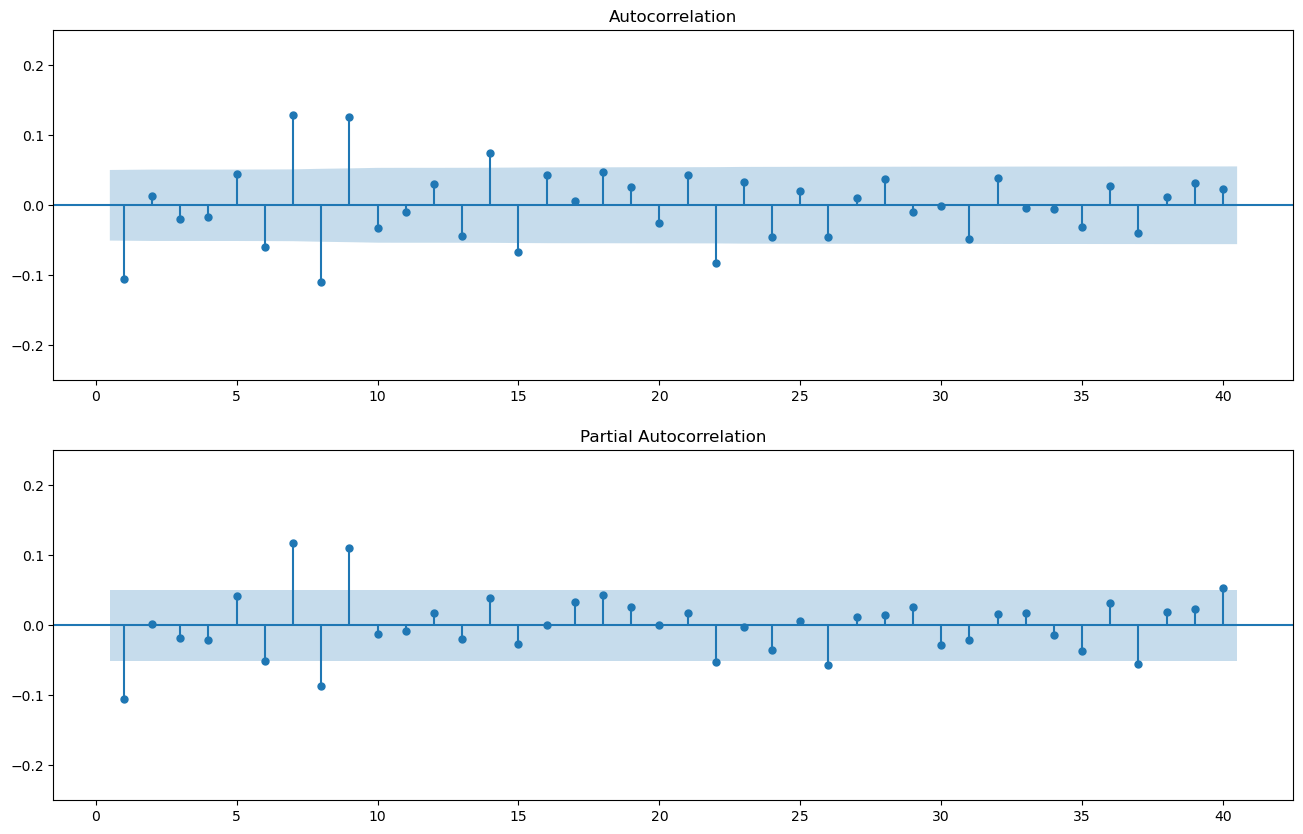

In [38]:
# Plot the ACF and PACF for the stationary data

fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series_relativechange.values[1:].squeeze()
                               , lags=40, ax=ax1, alpha=0.05, zero = False)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series_relativechange.values[1:],
                                lags=40, ax=ax2, alpha=0.05, zero = False)
ax1.set_ylim([-0.25,0.25])
ax2.set_ylim([-0.25,0.25])

# 3. ARMA 

In [39]:
#Autoregressive Moving Average process
np.random.seed(1)

arparams = np.array([0.75])
ar = np.r_[1, -arparams] # add zero-lag and negate, negation serves the purpose to align notation with popular literature
ma = np.r_[1,] # the function requires a zero-lag coefficient for the MA-part as well to work
y = sm.tsa.arma_generate_sample(ar, ma, 250, burnin = 1000) # simulate series with length 250

Text(0, 0.5, 'AR(1)')

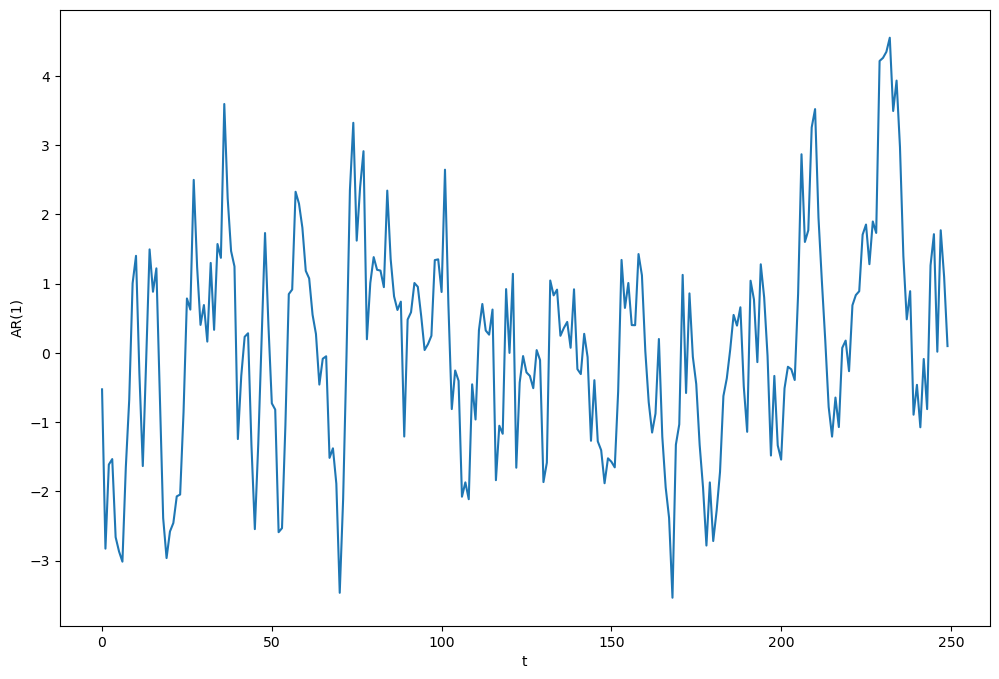

In [40]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(y)
plt.xlabel("t")
plt.ylabel("AR(1)")

In [41]:
# Simulate an AR(1) process
def ar1(phi, delta, n, scale=1, burnin=1000, seed=1, x_0=0):
    np.random.seed(seed)
    x_t = [x_0]
    for i in range(n + burnin):
        x_t.append(delta + x_t[i]*phi + np.random.normal(scale=scale))
    return x_t[-n:]

Text(0, 0.5, 'AR(1)')

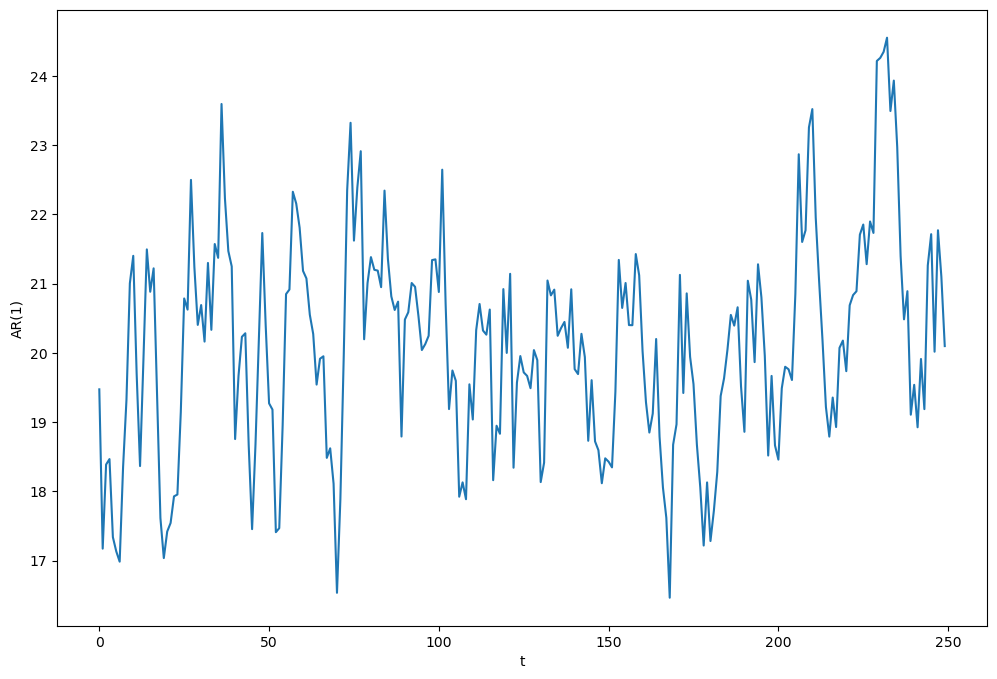

In [42]:
series = ar1(0.75, 5, 250)
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(series)
plt.xlabel("t")
plt.ylabel("AR(1)")

In [43]:
#Simulate an MA(1) process
def ma1(theta, mu, n, scale=1, burnin=1000, seed=1, e_0=0):
    np.random.seed(seed)
    e_tm1 = e_0
    x_t = []
    for i in range(n + burnin):
        e_t = np.random.normal(scale=scale)
        x_t.append(mu + e_tm1*theta + e_t)
        e_tm1 = e_t
    return x_t[-n:]

Text(0, 0.5, 'MA(1)')

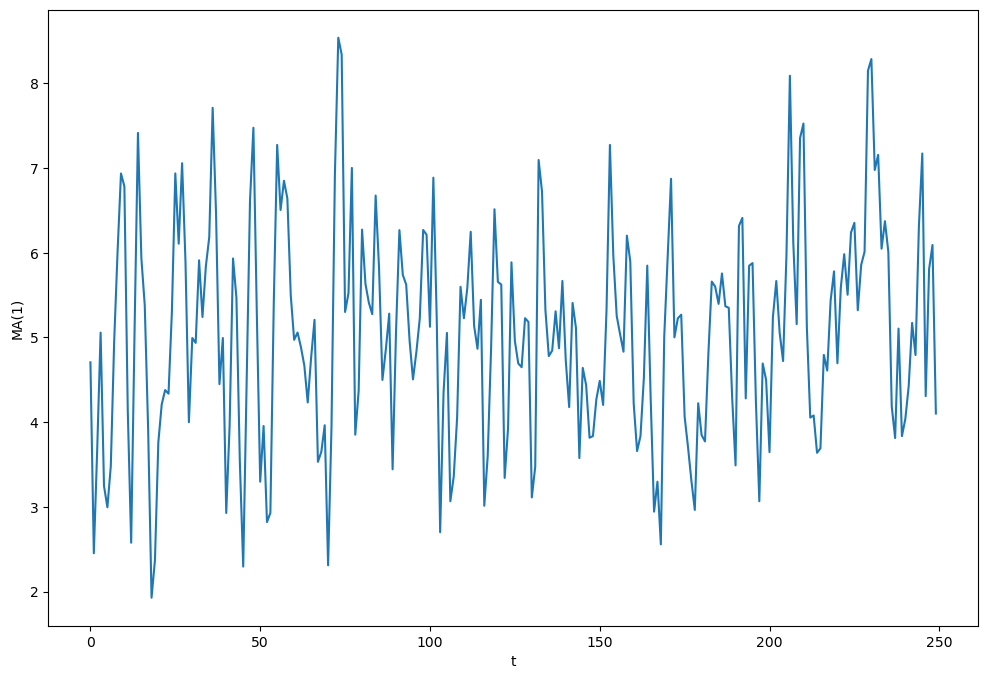

In [44]:
series = ma1(0.75, 5, 250)
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(series)
plt.xlabel("t")
plt.ylabel("MA(1)")